In [4]:
import pandas as pd

train_df = pd.read_csv('../NLP_dataset/train.csv')
test_df = pd.read_csv('../NLP_dataset/test.csv')
dev_df = pd.read_csv('../NLP_dataset/dev.csv')

In [14]:
train_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


### source와 label의 피어슨 상관계수

In [22]:
import torch
from torchmetrics import PearsonCorrCoef
from collections import Counter



target = train_df['source']
target_cnt = Counter(target)
target_dict = {}
i = 1
for key, value in target_cnt.items():
    target_dict[key] = i
    i += 1

print(target_dict)

def to_number(elem):
    return target_dict[elem]


target_tensor = torch.FloatTensor(list(map(to_number, train_df['source'])))
preds_tensor = torch.FloatTensor(train_df['label'])

pearson = PearsonCorrCoef()
pearson(preds_tensor, target_tensor) #low positive correlation

{'nsmc-sampled': 1, 'slack-rtt': 2, 'petition-sampled': 3, 'slack-sampled': 4, 'nsmc-rtt': 5, 'petition-rtt': 6}


tensor(0.2322)

### Source 상관관계 그림으로 그려보기

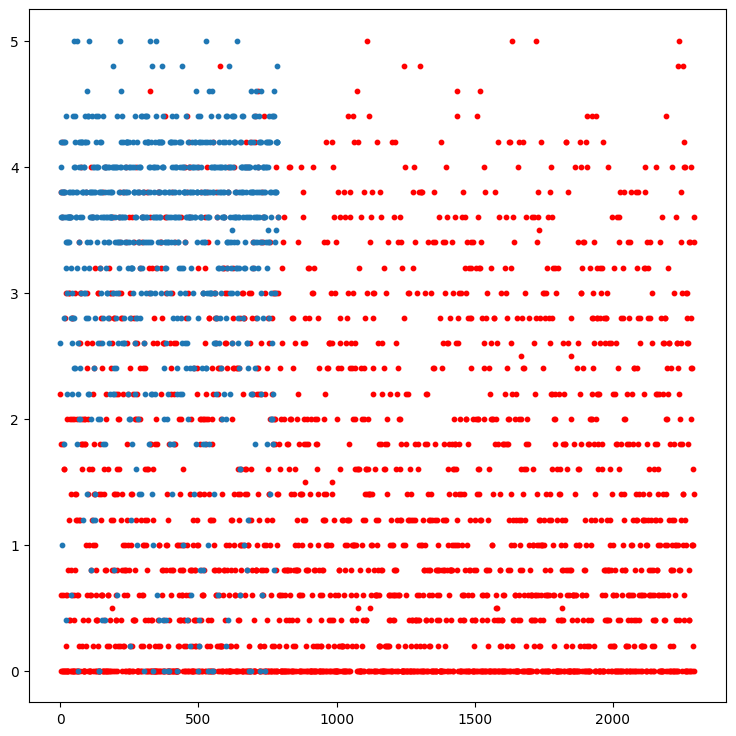

In [51]:
import matplotlib.pyplot as plt

x1 = train_df[train_df['source'] == 'nsmc-sampled']
x2 = train_df[train_df['source'] == 'nsmc-rtt']

x1_ = [i for i in range(len(x1))]
x2_ = [j for j in range(len(x2))]

plt.figure(figsize=(9, 9))
plt.scatter(x1_, x1['label'], s=10, c='red')
plt.scatter(x2_, x2['label'], s=10)


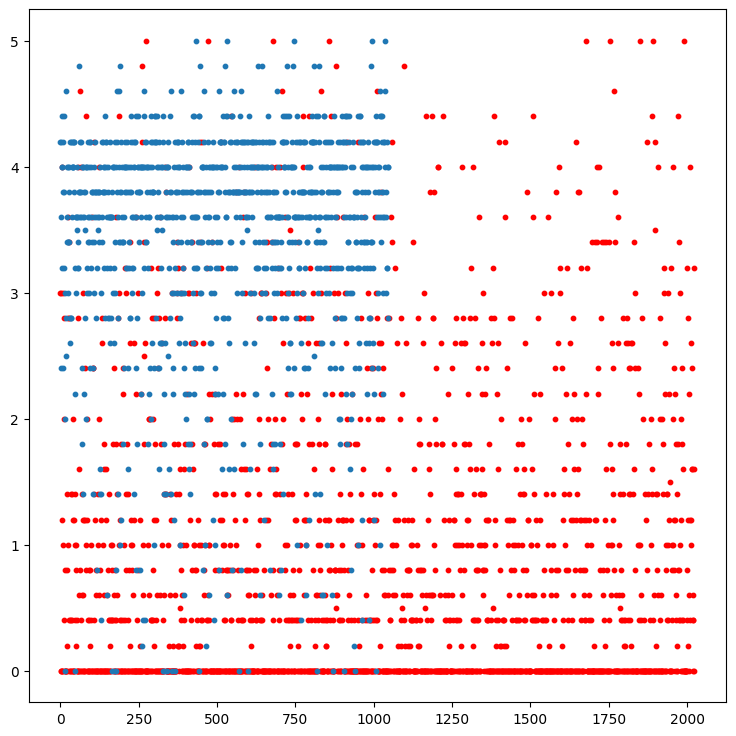

In [52]:
x3 = train_df[train_df['source'] == 'slack-sampled']
x4 = train_df[train_df['source'] == 'slack-rtt']

x3_ = [i for i in range(len(x3))]
x4_ = [j for j in range(len(x4))]

plt.figure(figsize=(9, 9))
plt.scatter(x3_, x3['label'], s=10, c='red')
plt.scatter(x4_, x4['label'], s=10)

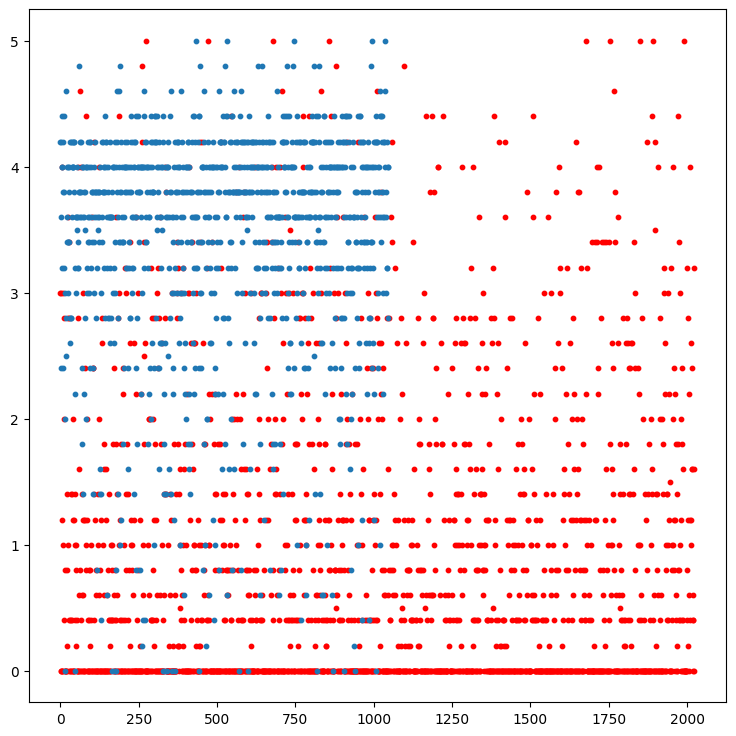

In [53]:
x5 = train_df[train_df['source'] == 'slack-sampled']
x6 = train_df[train_df['source'] == 'slack-rtt']

x5_ = [i for i in range(len(x5))]
x6_ = [j for j in range(len(x6))]

plt.figure(figsize=(9, 9))
plt.scatter(x5_, x5['label'], s=10, c='red')
plt.scatter(x6_, x6['label'], s=10)

In [55]:
x2_list = list(x2['label'])
x1_list = list(x1['label'])
nsmc_s_tensor = torch.FloatTensor(x1_list[:len(x2_list)])
nsmc_r_tensor = torch.FloatTensor(x2_list)

print(pearson(nsmc_r_tensor, nsmc_s_tensor))

x3_list = list(x3['label'])
x4_list = list(x4['label'])

slack_s_tensor = torch.FloatTensor(x3_list[:len(x4_list)])
slack_r_tensor = torch.FloatTensor(x4_list)

print(pearson(slack_s_tensor, slack_r_tensor))

x5_list = list(x5['label'])
x6_list = list(x6['label'])

petition_s_tensor = torch.FloatTensor(x5_list[:len(x6_list)])
petition_r_tensor = torch.FloatTensor(x6_list)

print(pearson(petition_s_tensor, petition_r_tensor))

tensor(0.0446)
tensor(0.0292)
tensor(0.0292)


[발견한 점]
1. sample의 개수가 rtt의 개수보다 많다.
2. sample 이 rtt보다 비교적 낮은 label을 가지고 있다.
3. 즉 rtt가 상대적으로 sample보다 높은 점수 주로 4점대? 를 가지고 있다.

### 텍스트 전처리
- ㅋㅋ 나 ㅎㅎ같은 단어들 지워보기(ㅋㅋㅋ, ㅎㅎㅎ, ㅜㅜ, ㅠㅠ, )
    - 지우는게 나을지 ㅋ하나 ㅎ 하나로 대체하는게 나을지?
- !, ~ 여러개 있는거 하나로 통함
boostcamp-sts-v1-train-397,slack-rtt,ㅋㅋ물안경 뭔데욬ㅋㅋ,하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하,0.0,0.0
위와 같이 한쪽 문장 의미가 아예 없을 경우는 어떻게 하는게 좋을지?



In [17]:
import re

def make_one_chars(sentence, s):
    pattern = re.compile('[+'+ s +']')
    sentence = pattern.sub(s, sentence)
    return sentence

def make_kh_one(sentence):
    while "ㅋㅋ" in sentence:
        sentence.replace("ㅋㅋ", "ㅋ")
    while "ㅎㅎ" in sentence:
        sentence.replace("ㅎㅎ", "ㅎ")
    return sentence

def remove_char(sentence): #ㅋㅋㅋ 나 ㅎㅎ가 연속으로 나오는거 필요 없을 수도 있으니 아예 제거하는
    while "ㅎ" in sentence:
        sentence.replace("ㅎ", "") 
    while "ㅋ" in sentence:
        sentence.replace("ㅋ", "") 
    return sentence


In [23]:
df_test = train_df
df_test['sentence_1'] = [re.compile('[+ㅋ]').search(s) for s in train_df['sentence_1']]
print(df_test['sentence_1'])

error: nothing to repeat at position 0